### Simple Neural Network Classifier
In this notebook we will just use our raw data on a simple neural network classifier.

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wfdb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
import functions as f

Let's load a sample of our data set and feed it into a simple neural network.

In [143]:
path = '../data/physionet.org/files/ptb-xl/1.0.3/'
metadata = pd.read_csv('../data/cleaned_metadata.csv')

# Load sample data using high frequency
X_sample, y_sample = f.load_sample_signal(5000, path, metadata, freq='high')

Below we have the option of reshaping our data if we wish to by flattening the 12 leads out. 

In [144]:
# Reshaping 
# X_sample = X_sample.reshape(100, -1)
X_sample = X_sample[:,:,0]

We also need to change our labels in our target column to numerical values. We can do that using `LabelEncoder()`.

In [145]:
label = LabelEncoder()
label.fit(y_sample)
y_sample = label.transform(y_sample)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, stratify=y_sample, random_state=42)

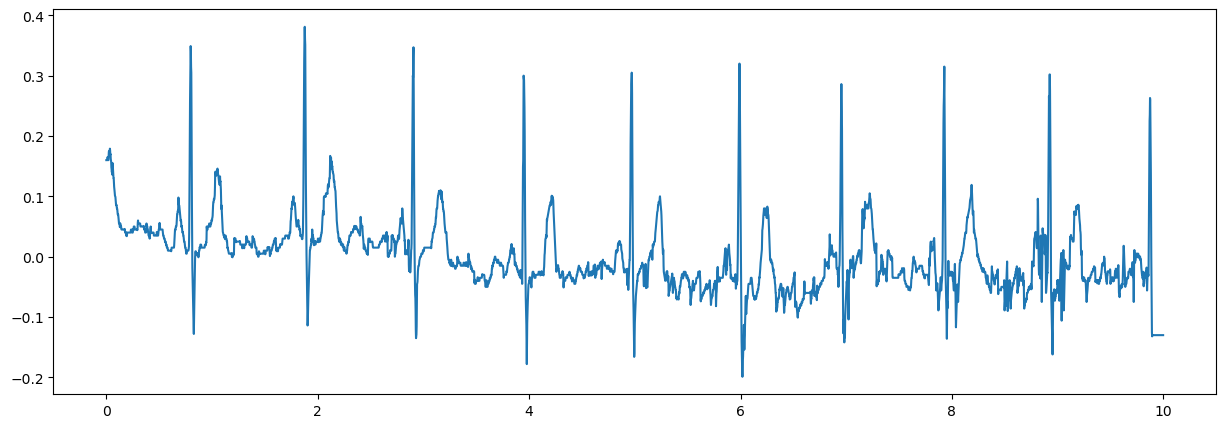

In [147]:
# Example signal
sig_len = 5000
sampling_frequency = 500

time = np.arange(0, sig_len) / sampling_frequency

plt.figure(figsize=(15,5))
plt.plot(time, X_sample[0,:])
plt.title("Sample Signal");

Now we will build our neural network.

In [201]:
# Neural Network 
model = Sequential()

# Hidden layers
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(25, activation='relu'))

# Output layers
model.add(layers.Dense(5, activation='softmax'))

In [202]:
model.compile(
    # Optimizer
    optimizer=Adam(learning_rate=0.0005),  # learning rate can be adjusted here
    # Loss function to minimize
    loss=SparseCategoricalCrossentropy(),
    # Metric used to evaluate model
    metrics=[SparseCategoricalAccuracy()]
)

In [203]:
history = model.fit(X_train, y_train, epochs=30, verbose=2, validation_split=0.1,
                    #callbacks=[keras.callbacks.EarlyStopping()]
                   )

Epoch 1/30
113/113 - 2s - loss: 1.6057 - sparse_categorical_accuracy: 0.3575 - val_loss: 1.4827 - val_sparse_categorical_accuracy: 0.4575 - 2s/epoch - 15ms/step
Epoch 2/30
113/113 - 1s - loss: 1.5360 - sparse_categorical_accuracy: 0.3814 - val_loss: 1.4930 - val_sparse_categorical_accuracy: 0.4525 - 1s/epoch - 10ms/step
Epoch 3/30
113/113 - 1s - loss: 1.5656 - sparse_categorical_accuracy: 0.4069 - val_loss: 1.4943 - val_sparse_categorical_accuracy: 0.4525 - 1s/epoch - 10ms/step
Epoch 4/30
113/113 - 1s - loss: 1.4780 - sparse_categorical_accuracy: 0.4136 - val_loss: 1.4769 - val_sparse_categorical_accuracy: 0.4525 - 1s/epoch - 10ms/step
Epoch 5/30
113/113 - 1s - loss: 1.4547 - sparse_categorical_accuracy: 0.4294 - val_loss: 1.4615 - val_sparse_categorical_accuracy: 0.4550 - 1s/epoch - 10ms/step
Epoch 6/30
113/113 - 1s - loss: 1.4812 - sparse_categorical_accuracy: 0.4214 - val_loss: 1.4640 - val_sparse_categorical_accuracy: 0.4425 - 1s/epoch - 10ms/step
Epoch 7/30
113/113 - 1s - loss: 1.

In [204]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_106 (Dense)           (None, 1000)              5001000   
                                                                 
 dropout_29 (Dropout)        (None, 1000)              0         
                                                                 
 dense_107 (Dense)           (None, 200)               200200    
                                                                 
 dropout_30 (Dropout)        (None, 200)               0         
                                                                 
 dense_108 (Dense)           (None, 25)                5025      
                                                                 
 dense_109 (Dense)           (None, 5)                 130       
                                                                 
Total params: 5,206,355
Trainable params: 5,206,355
N

In [205]:
# Evaluate the model using the test data and generate predictions
train_accuracy = history.history["sparse_categorical_accuracy"][-1]
result = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {result[1]:.4f}")

Train Accuracy: 0.6717
Test Accuracy: 0.3970


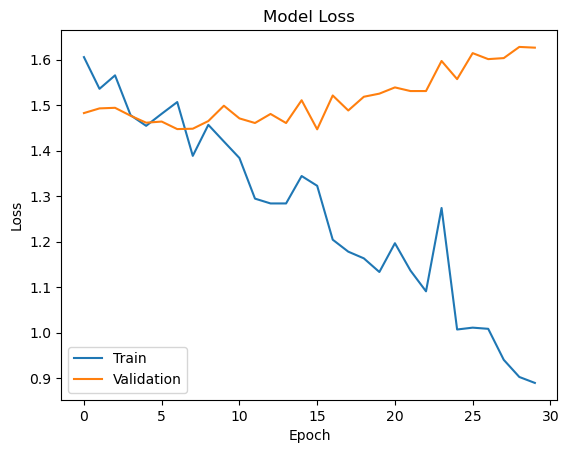

In [206]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()